In [1]:
'''
Analysis for "Technical considerations of MSK femoral cartilage segmentation using CNNs"

@author: Arjun Desai, Stanford University
         (c) Stanford University, 2018
'''

import sys
sys.path.insert(0, '../')

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
fsize = 15
params = {'legend.fontsize': fsize*0.925,          
          'axes.labelsize': fsize,
          'axes.titlesize':fsize*1.25,
          'xtick.labelsize':fsize*0.925,
          'ytick.labelsize':fsize*0.925 }
sns.set(palette='pastel', rc=params)


import os
import numpy as np
import scipy.io as sio

import seaborn as sns

import utils
from analysis import analysis_funcs as af
from analysis import stats
import pandas as pd

from pystats.pystats import stats as pyss

/home/arjundd/anaconda3/envs/tf_36/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


        DSC          
[0.76595627 0.03672882]
[0.74581177 0.03975717]
[0.77377658 0.03592648]
r2, r - U-Net : 0.9577, 0.9786
r2, r - SegNet : 0.9282, 0.9635
r2, r - DLV3+ : 0.9195, 0.9589
        VOE          
[ 0.41844145 -0.17832071]
[ 0.449181   -0.17335555]
[ 0.41627207 -0.19011812]
r2, r - U-Net : 0.9812, 0.9905
r2, r - SegNet : 0.9667, 0.9832
r2, r - DLV3+ : 0.9557, 0.9776
        CV          
[ 0.10516422 -0.39126001]
[ 0.11894699 -0.39801299]
[ 0.15475838 -0.5740492 ]
r2, r - U-Net : 0.9206, 0.9595
r2, r - SegNet : 0.6324, 0.7952
r2, r - DLV3+ : 0.8184, 0.9046


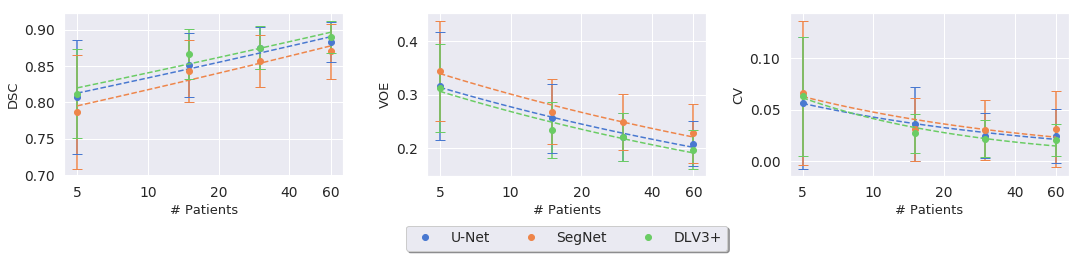

In [2]:
# Data limitation graphs
# Each architecture was run with multiple seeds
import os 

unet_data_limitation_path = '/bmrNAS/people/arjun/msk_seg_networks/data_limit/%03d/unet_2d/%s/test_results'
segnet_data_limitation_path = '/bmrNAS/people/arjun/msk_seg_networks/data_limit/%03d/segnet_2d/%s/test_results'
deeplab_data_limitation_path = '/bmrNAS/people/arjun/msk_seg_networks/data_limit/%03d/deeplabv3_2d/%s/test_results/16_2-4-6'

dl_unet = [ # Seed 1
            [unet_data_limitation_path % (5, '2018-11-29-02-33-48'), 
             unet_data_limitation_path % (15, '2018-11-29-22-10-02'), 
             unet_data_limitation_path % (30, '2018-11-30-09-10-38'),
             unet_data_limitation_path % (60, '2018-11-30-18-33-42')],
    
            # Seed 2
            [unet_data_limitation_path % (5, '2018-11-29-02-34-10'), 
             unet_data_limitation_path % (15, '2018-11-29-21-21-16'), 
             unet_data_limitation_path % (30, '2018-11-30-07-54-29'),
             unet_data_limitation_path % (60, '2018-11-30-16-55-30')],
            
            # Seed 3
            [unet_data_limitation_path % (5, '2018-12-03-15-51-26'), 
             unet_data_limitation_path % (15, '2018-12-04-13-20-08'), 
             unet_data_limitation_path % (30, '2018-12-05-00-34-12'),
             unet_data_limitation_path % (60, '2018-12-05-19-07-13')]
           ]

dl_segnet = [   # Seed 1
                [segnet_data_limitation_path % (5, '2018-12-01-04-11-16'), 
                 segnet_data_limitation_path % (15, '2018-12-02-18-35-51'), 
                 segnet_data_limitation_path % (30, '2018-12-03-14-52-26'),
                 segnet_data_limitation_path % (60, '2018-12-04-06-28-10')],

                # Seed 2
                [segnet_data_limitation_path % (5, '2018-12-01-01-56-37'), 
                 segnet_data_limitation_path % (15, '2018-12-02-16-38-02'), 
                 segnet_data_limitation_path % (30, '2018-12-03-12-49-00'),
                 segnet_data_limitation_path % (60, '2018-12-04-04-21-46')],

                # Seed 3
                [segnet_data_limitation_path % (5, '2018-12-06-10-28-22'), 
                 segnet_data_limitation_path % (15, '2018-12-10-00-11-08'), 
                 segnet_data_limitation_path % (30, '2018-12-11-00-16-35'),
                 segnet_data_limitation_path % (60, '2018-12-11-20-08-23')]
            ]


dl_deeplab = [  # Seed 1
                [deeplab_data_limitation_path % (5, '2018-12-04-20-29-16'), 
                 deeplab_data_limitation_path % (15, '2018-12-06-04-11-52'), 
                 deeplab_data_limitation_path % (30, '2018-12-07-23-15-37'),
                 deeplab_data_limitation_path % (60, '2018-12-10-00-14-26')],

                # Seed 2
                [deeplab_data_limitation_path % (5, '2018-12-04-18-29-25'), 
                 deeplab_data_limitation_path % (15, '2018-12-06-01-36-00'), 
                 deeplab_data_limitation_path % (30, '2018-12-07-20-22-32'),
                 deeplab_data_limitation_path % (60, '2018-12-10-19-04-03')],

                # Seed 3
                [deeplab_data_limitation_path % (5, '2018-12-10-00-25-43'), 
                 deeplab_data_limitation_path % (15, '2018-12-11-08-53-04'), 
                 deeplab_data_limitation_path % (30, '2018-12-12-01-36-26'),
                 deeplab_data_limitation_path % (60, '2018-12-12-16-39-41')]
              ]

data = {'filename': 'data_limitation', 'keys': ['U-Net', 'SegNet', 'DLV3+'], 
        'U-Net': dl_unet, 'SegNet': dl_segnet, 'DLV3+': dl_deeplab}

ov_data = {'dsc': data,
          'voe': data,
          'cvs': data}

# ov_data = {'dsc': data,
#           'voe': data}
af.graph_data_limitation(ov_data, 'data_limitation')

        DSC          
r2, r - U-Net : nan, nan
r2, r - SegNet : nan, nan
r2, r - DLV3+ : nan, nan
        VOE          
r2, r - U-Net : 0.7728, 0.8791
r2, r - SegNet : 0.7441, 0.8626
r2, r - DLV3+ : 0.7344, 0.8570
        CV          
r2, r - U-Net : 0.5266, 0.7257
r2, r - SegNet : 0.1800, 0.4243
r2, r - DLV3+ : -0.3031, nan


../analysis/analysis_funcs.py:289: RuntimeWarning: overflow encountered in exp
  exp = np.exp(b * x)
../analysis/analysis_funcs.py:300: RuntimeWarning: invalid value encountered in log
  log_y = np.log(y - asymtote)
../analysis/analysis_funcs.py:294: RuntimeWarning: invalid value encountered in log
  return np.log(a) + b * x
../analysis/analysis_funcs.py:146: RuntimeWarning: invalid value encountered in sqrt
  print('r2, r - %s : %0.4f, %0.4f' % (model, r2, np.sqrt(r2)))


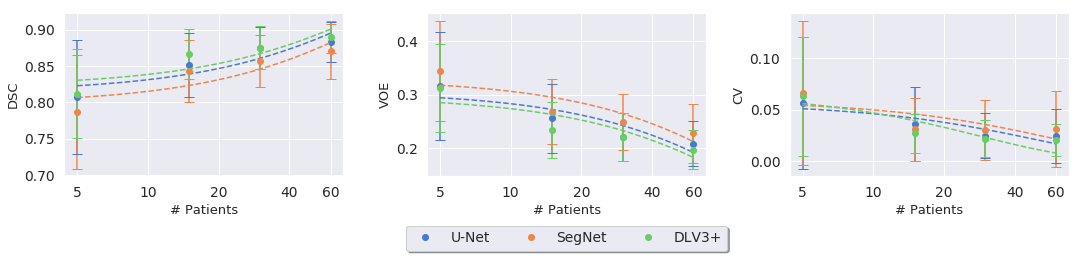

In [3]:
af.graph_data_limitation(ov_data, 'data_limitation', decay_exp_fit=True)

In [4]:
# b values for Dice
def info_per_seed(seed, param='dsc'):
    print('=======SEED %d=======' % (seed+1))
    data = {'filename': 'data_limitation', 'keys': ['U-Net', 'SegNet', 'DLV3+'], 
            'U-Net': [dl_unet[seed]], 'SegNet': [dl_segnet[seed]], 'DLV3+': [dl_deeplab[seed]]}

    ov_data = {'dsc': data,
              'voe': data,
              'cvs': data}
    res = af.get_data_limitation(ov_data[param], param)

    xs, ys, SEs, x_sim, y_sim, r2, a1, b1 = res['U-Net']
    print('%s\t\ta: %0.6f\tb:%0.6f' % ('U-Net', a1, b1))

    xs, ys, SEs, x_sim, y_sim, r2, a2, b2 = res['SegNet']
    print('%s\t\ta: %0.6f\tb:%0.6f' % ('SegNet', a2, b2))

    xs, ys, SEs, x_sim, y_sim, r2, a3, b3 = res['DLV3+']
    print('%s\t\ta: %0.6f\tb:%0.6f' % ('DLV3+', a3, b3))
    print('')
    print('')
    
    return [a1, a2, a3], [b1, b2, b3]

In [6]:
# Calculate average values for dice
As = []
Bs = []

a, b = info_per_seed(0, 'dsc')
As.append(a); Bs.append(b)

a, b = info_per_seed(1, 'dsc')
As.append(a); Bs.append(b)

a, b = info_per_seed(2, 'dsc')
As.append(a); Bs.append(b)

As = np.transpose(np.asarray(As))
print(As)
display(stats.kruskal_dunn(As, ['U-Net', 'SegNet', 'DLV3+']))

Bs = np.transpose(np.asarray(Bs))
print(Bs)
display(stats.kruskal_dunn(Bs, ['U-Net', 'SegNet', 'DLV3+']))

models = ['U-Net', 'SegNet', 'DLV3+']
for i in range(3):
    print('%s\ta: %0.4f +/- %0.4f\tb: %0.4f +/- %0.4f' % (models[i], 
                                                np.mean(As[i,...]), np.std(As[i,...]), 
                                                np.mean(Bs[i,...]), np.std(Bs[i,...])))

=======SEED 1=======
[0.76707937 0.03617405]
[0.70501708 0.05366153]
[0.80384287 0.02519781]
U-Net		a: 0.767079	b:0.036174
SegNet		a: 0.705017	b:0.053662
DLV3+		a: 0.803843	b:0.025198


=======SEED 2=======
[0.75211363 0.04190405]
[0.78965859 0.02667926]
[0.8109862  0.02270353]
U-Net		a: 0.752114	b:0.041904
SegNet		a: 0.789659	b:0.026679
DLV3+		a: 0.810986	b:0.022704


=======SEED 3=======
[0.77889676 0.03210561]
[0.74400849 0.03930527]
[0.70987695 0.06008351]
U-Net		a: 0.778897	b:0.032106
SegNet		a: 0.744008	b:0.039305
DLV3+		a: 0.709877	b:0.060084


[[0.76707937 0.75211363 0.77889676]
 [0.70501708 0.78965859 0.74400849]
 [0.80384287 0.8109862  0.70987695]]


AttributeError: module 'analysis.stats' has no attribute 'kruskal_dunn'

In [ ]:
# calculate % of performance achieved by 6 patients compared to 60 (dice accuracy)
xs = np.linspace(5, 60, num=200)

unet_alpha, unet_beta = (0.76595627, 0.03672882)
segnet_alpha, segnet_beta = (0.74581177, 0.03975717)
dl_alpha, dl_beta = (0.77377658, 0.03592648)

pl_fit = lambda x, alpha, beta: alpha * x**beta

print('%s - %0.5f' % ('U-Net', pl_fit(6, unet_alpha, unet_beta) / pl_fit(60, unet_alpha, unet_beta)))
print('%s - %0.5f' % ('SegNet', pl_fit(6, segnet_alpha, segnet_beta) / pl_fit(60, segnet_alpha, segnet_beta)))
print('%s - %0.5f' % ('DLV3+', pl_fit(6, dl_alpha, dl_beta) / pl_fit(60, dl_alpha, dl_beta)))
print('')

inv_fit = lambda y, alpha, beta: (y/alpha) ** (1/beta)
print('%s 95- %0.5f' % ('U-Net', inv_fit(0.95, unet_alpha, unet_beta)))
print('%s 95- %0.5f' % ('SegNet', inv_fit(0.95, segnet_alpha, segnet_beta)))
print('%s 95 - %0.5f' % ('DLV3+', inv_fit(0.95, dl_alpha, dl_beta)))
print('')
print('%s 99- %0.5f' % ('U-Net', inv_fit(0.99, unet_alpha, unet_beta)))
print('%s 99- %0.5f' % ('SegNet', inv_fit(0.99, segnet_alpha, segnet_beta)))
print('%s 99 - %0.5f' % ('DLV3+', inv_fit(0.99, dl_alpha, dl_beta)))
print('')

per_dsc = [pl_fit(xs, unet_alpha, unet_beta)/ pl_fit(60, unet_alpha, unet_beta) * 100,
          pl_fit(xs, segnet_alpha, segnet_beta)/ pl_fit(60, segnet_alpha, segnet_beta) * 100,
          pl_fit(xs, dl_alpha, dl_beta)/ pl_fit(60, dl_alpha, dl_beta) * 100]

In [ ]:
# calculate % of performance achieved by 6 patients compared to 60 (VOE)
unet_alpha, unet_beta = (0.41844145, -0.17832071)
segnet_alpha, segnet_beta = (0.449181, -0.17335555)
dl_alpha, dl_beta = (0.41627207, -0.19011812)

pl_fit = lambda x, alpha, beta: alpha * x**beta

print('%s - %0.5f' % ('U-Net', (1-pl_fit(6, unet_alpha, unet_beta)) / (1-pl_fit(60, unet_alpha, unet_beta))))
print('%s - %0.5f' % ('SegNet', (1-pl_fit(6, segnet_alpha, segnet_beta)) / (1-pl_fit(60, segnet_alpha, segnet_beta))))
print('%s - %0.5f' % ('DLV3+', (1-pl_fit(6, dl_alpha, dl_beta)) / (1-pl_fit(60, dl_alpha, dl_beta))))

per_voe = [pl_fit(xs, unet_alpha, unet_beta)/ pl_fit(60, unet_alpha, unet_beta) * 100,
          pl_fit(xs, segnet_alpha, segnet_beta)/ pl_fit(60, segnet_alpha, segnet_beta) * 100,
          pl_fit(xs, dl_alpha, dl_beta)/ pl_fit(60, dl_alpha, dl_beta) * 100]

In [ ]:
# calculate % of performance achieved by 6 patients compared to 60 (CV)
unet_alpha, unet_beta = (0.10516422, -0.39126001)
segnet_alpha, segnet_beta = (0.11894699, -0.39801299)
dl_alpha, dl_beta = (0.15475838, -0.5740492)

pl_fit = lambda x, alpha, beta: alpha * x**beta

print('%s - %0.5f' % ('U-Net', (1-pl_fit(6, unet_alpha, unet_beta)) / (1-pl_fit(60, unet_alpha, unet_beta))))
print('%s - %0.5f' % ('SegNet', (1-pl_fit(6, segnet_alpha, segnet_beta)) / (1-pl_fit(60, segnet_alpha, segnet_beta))))
print('%s - %0.5f' % ('DLV3+', (1-pl_fit(6, dl_alpha, dl_beta)) / (1-pl_fit(60, dl_alpha, dl_beta))))

per_cv = [pl_fit(xs, unet_alpha, unet_beta)/ pl_fit(60, unet_alpha, unet_beta) * 100,
          pl_fit(xs, segnet_alpha, segnet_beta)/ pl_fit(60, segnet_alpha, segnet_beta) * 100,
          pl_fit(xs, dl_alpha, dl_beta)/ pl_fit(60, dl_alpha, dl_beta) * 100]

## Training Profiles

In [ ]:
# Initialize data filepaths
from copy import deepcopy
data_filepaths = {'U-Net': deepcopy(dl_unet), 'SegNet': deepcopy(dl_segnet), 'DLV3+': deepcopy(dl_deeplab)}
for network in data_filepaths.keys():
    fps = data_filepaths[network]
    for i in range(len(fps)):
        for j in range(len(fps[i])):
            s_ind = fps[i][j].find('test_results')
            fps[i][j] = os.path.join(fps[i][j][:s_ind], 'pik_data.dat')
    data_filepaths[network] = np.asarray(fps)

# color -> network, linestyle -> seed
cpal = sns.color_palette("muted", 3)
lstyles = ['--', ':', '-.']

# Define function for smoothing loss
def linear_smoothing(vals, weight=0.6):
    assert weight > 0 and weight <= 1
    info = [vals[i-1]*weight + vals[i]*(1-weight) for i in range(1,len(vals))]
    a = [info[0]]
    a.extend(info)
    return a

In [ ]:
# Plot validation loss profile for 3 networks, averaged across different seeds
smoothing_factor = 0.8
fig, axs = plt.subplots(2, 2, sharey='all', figsize=(18, 8))
axs = axs.flatten()

networks = data_filepaths.keys()
for axs_ind, ax in enumerate(axs):
    for net_ind, network in enumerate(networks):
        fps = data_filepaths[network][:, axs_ind]
        epochs = utils.io_utils.load_pik(fps[0])[0]
        val_data = []
        for fp in fps:
            smooth_val_data = linear_smoothing(utils.io_utils.load_pik(fp)[2], smoothing_factor)
            val_data.append(smooth_val_data)
        val_loss = np.mean(np.asarray(val_data), axis=0)
        ax.plot(epochs, val_loss, color=cpal[net_ind], label=network, linewidth=3)
plt.subplots_adjust(wspace=0.05, hspace=0.28)
axs[2].set_ylabel('Validation Loss', y=1.1, fontsize=20)
ax = axs[-1]
ax.set_xlabel('Epochs', fontsize=20, x=-0.05)
#ax.legend(loc='upper center', bbox_to_anchor=(0, -0.22), ncol=len(networks))
ax.legend(loc='center left', bbox_to_anchor=(1, 1.15))
for ds_ind, ds in enumerate(['(A) 5', '(B) 15', '(C) 30', '(D) 60']):
    axs[ds_ind].set_title('%s subjects' % ds, fontsize=22, fontweight='bold')
plt.savefig('/bmrNAS/people/arjun/msk_seg_networks/analysis/data-limit-val-loss.png', dpi=800, bbox_to_inches='tight')

In [ ]:
# Plot validation loss profile for 3 networks, averaged across different seeds
smoothing_factor = 0.8
num_points = 100
networks = data_filepaths.keys()
fig, axs = plt.subplots(len(networks), 4, sharey='all', sharex='col', figsize=(20, 10))

for net_ind, network in enumerate(networks):
    for ds_ind, data_size in enumerate([5, 15, 30, 60]):
        fps = data_filepaths[network][:, ds_ind]
        epochs = utils.io_utils.load_pik(fps[0])[0]
        for fp_ind, fp in enumerate(fps):
            val_loss_smooth = linear_smoothing(utils.io_utils.load_pik(fp)[2], smoothing_factor)
            axs[net_ind][ds_ind].plot(epochs, val_loss_smooth, color=cpal[fp_ind], 
                                        linestyle=lstyles[fp_ind],
                                        label='Seed %d' % (fp_ind+1), 
                                        linewidth=3)
        axs[net_ind][0].set_ylabel(network, fontsize=15, fontweight='bold')
        axs[0][ds_ind].set_title('%d subjects' % data_size, fontsize=15, fontweight='bold')
plt.subplots_adjust(wspace=0.05, hspace=0.1)

axs[-1][2].set_xlabel('Epochs', x=0)
axs[1][-1].legend(loc='center left', bbox_to_anchor=(1, 1.15))